Example of Euler's method
---
<div>
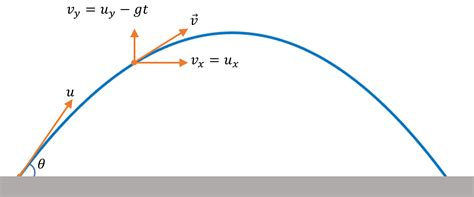
</div>

This example supersedes the starter code described in the README.md file 

In [12]:
vinit = 10 # m/s
theta0 = 45 # degrees
dt = 0.01 # seconds

In [13]:
print("Simulating projectile motion with params:")
print("(vinit,theta0,dt)=(%7.2lf,%7.2f,%7.2f)" % (vinit,theta0,dt))

Simulating projectile motion with params:
(vinit,theta0,dt)=(  10.00,  45.00,   0.01)


In [14]:
from matplotlib import pyplot as plt
from math import sin,cos,pi
import numpy as np

In [15]:
# initial coordinate values: position and velocity 
#  x y          vx                         vy
y0=[0.,0.,vinit*cos(theta0*pi/180),vinit*sin(theta0*pi/180)]
# acceleration due to gravity
g=9.81  # m/s^2

In [16]:
# the functions = derivatives of the coortinates wrt t
def f0(t,y):
    return y[2]  # v_x
def f1(t,y):
    return y[3]  # v_y
def f2(t,y):
    return 0     # acceleration in x
def f3(t,y):
    return -g    # acceleration in y

In [17]:
t=[0]   # keep track of steps in time
y=y0[:] # copy the starting coordinates
trajectory=np.asarray([y0]) # store trajectory

In [18]:
# propagate our projectile
while y[1]>=0:
    y[0]= y[0]+f0(t[-1],y)*dt
    y[1]= y[1]+f1(t[-1],y)*dt
    y[2]= y[2]+f2(t[-1],y)*dt
    y[3]= y[3]+f3(t[-1],y)*dt
    t.append(t[-1]+dt)
    trajectory=np.append(trajectory,[y],axis=0)

In [19]:
# get trajectories for each coordinate
sx = trajectory[:,0] 
sy = trajectory[:,1]
vx = trajectory[:,2]
vy = trajectory[:,3]

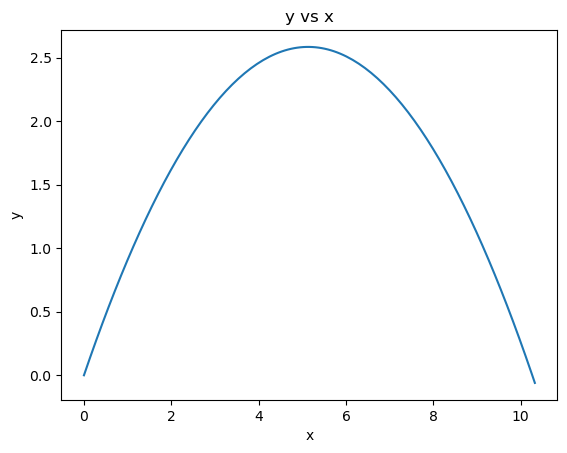

In [20]:
plt.plot(sx, sy)
plt.title("y vs x"),plt.xlabel("x"),plt.ylabel("y");

Study and assess the performance of the Euler algorithm, you can do this in a variety of ways, for example:

* Observe the calculated landing location versus the time step (similarly the error wrt the analytic solution).
* Can you find a time step where the landing location is a “pretty good” match to the expected position?
* Is this observation stable with changes to the initial conditions?
* Plot the difference in x and y position (or velocity) versus time compared to the analytic solution
* Plot the energy of the projectile versus time
* …


In [21]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("trajectory.dat")
t = data[:,0]
x = data[:,1]
y = data[:,2]
vx = data[:,3]
vy = data[:,4]


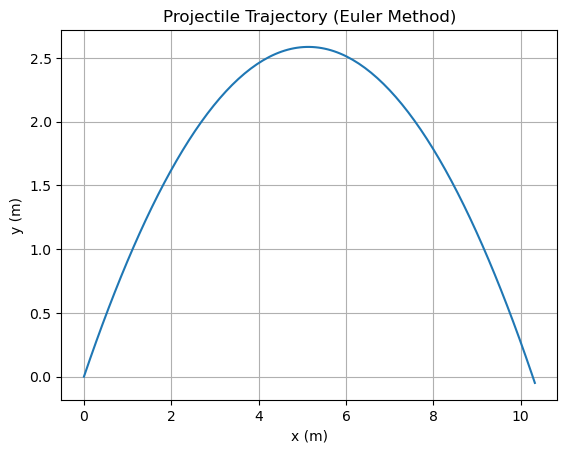

In [22]:
plt.plot(x, y)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Projectile Trajectory (Euler Method)")
plt.grid()
plt.show()


In [23]:
g = 9.8
v0 = 10        # match your C++ settings
theta0 = 45 * np.pi / 180

x_exact = v0 * np.cos(theta0) * t
y_exact = v0 * np.sin(theta0) * t - 0.5 * g * t**2


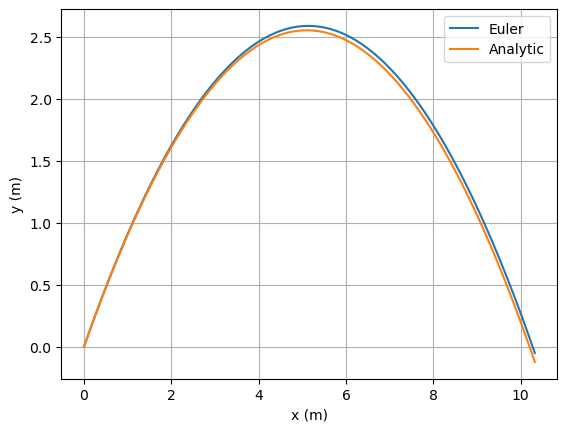

In [24]:
plt.plot(x, y, label="Euler")
plt.plot(x_exact, y_exact, label="Analytic")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.legend()
plt.grid()
plt.show()


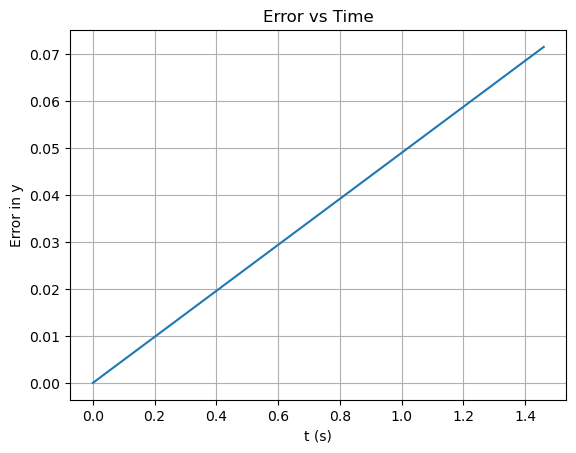

In [25]:
#Error in y:
err_y = y - y_exact

plt.plot(t, err_y)
plt.xlabel("t (s)")
plt.ylabel("Error in y")
plt.title("Error vs Time")
plt.grid()
plt.show()


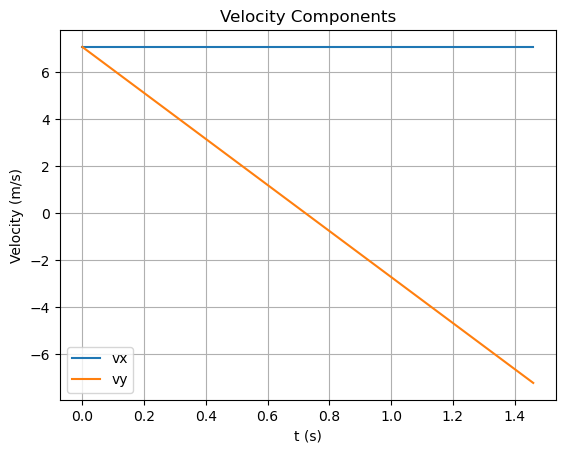

In [26]:
plt.plot(t, vx, label="vx")
plt.plot(t, vy, label="vy")
plt.xlabel("t (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity Components")
plt.legend()
plt.grid()
plt.show()


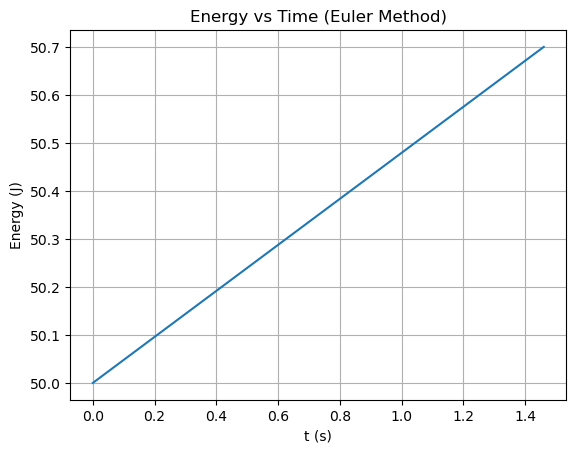

In [27]:
E = 0.5*(vx**2 + vy**2) + g*y

plt.plot(t, E)
plt.xlabel("t (s)")
plt.ylabel("Energy (J)")
plt.title("Energy vs Time (Euler Method)")
plt.grid()
plt.show()


In [ ]:
Euler method becomes more accurate when dt is smaller.
vx stays constant because no horizontal force.
vy decreases linearly due to gravity.
Energy is not perfectly conserved because Euler is only first-order accurate.
For dt = 0.01 s, the landing location is close to the analytic value (~10.2 m).
Error increases with time because Euler accumulates approximation errors.